In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Testing different datasets

In [2]:
df=pd.read_csv('/content/Train.csv')

In [4]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> This dataset contains features numbered from 1 to 1558, and each wafer is labeled as either defective or normal. According to the dataset, there are only two classes: 0 (normal) and 1 (defective), so defect categories like center, donut, edge-local, edge-ring, local, near, full, random, and scratch are not available.

In [9]:
import cv2
img=cv2.imread('/content/641447.jpg')
img.shape

(32, 32, 3)

In [11]:
img.shape[0]*img.shape[1]*img.shape[2]

3072

> By using image features, each data point is represented by 3,072 features, enabling classification of various defect types.

In [13]:
numpy_file=np.load('/content/drive/MyDrive/Wafer_Map_Datasets.npz')

In [28]:
X=numpy_file['arr_0']

In [29]:
X.shape

(38015, 52, 52)

In [30]:
Y=numpy_file['arr_1']

In [31]:
Y.shape

(38015, 8)

> We are gonna proceed with mixed type wafer defect detection.



### Visualize data ‌as an image

In [40]:
sample=X[0,:,:]
sample_label=Y[1,:]

In [62]:
np.where(sample_label == 1)[0]

array([0, 2, 6])

In [57]:
sample_class_label=["Center","Donut","Edge_local","Edge_ring","near_full","scratch","random"]
sample_label_name = [sample_class_label[i] for i in np.where(sample_label == 1)[0]]

In [58]:
sample_label_name

['Center', 'Edge_local', 'random']

['Center', 'Edge_local', 'random']

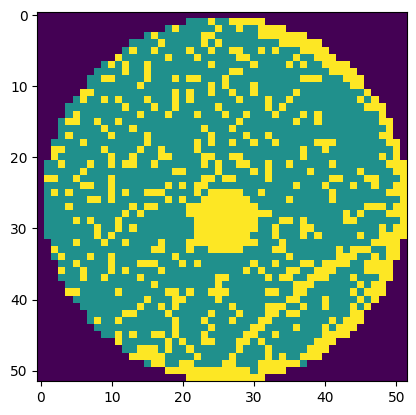

In [59]:
plt.imshow(sample)
sample_label_name

### EDA

In [74]:
X_flat = X.reshape(38015, -1)
df = pd.DataFrame(X_flat)

In [75]:
Y.shape

(38015, 8)

In [95]:
sample_class_label = ["Center", "Donut", "Edge_local", "Edge_ring", "Local","near_full", "scratch", "random"]

def change_label(row):
  if np.sum(row) == 0:
    return "normal"
  else:
    return [sample_class_label[i] for i in np.where(row == 1)[0]]

Y_label = [change_label(row) for row in Y]

In [96]:
len(Y_label)

38015

In [97]:
df['labels'] = Y_label

In [98]:
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,2695,2696,2697,2698,2699,2700,2701,2702,2703,labels
count,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,...,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015.0,38015
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Center, Edge_local, scratch]"
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [99]:
df['labels'].value_counts()

,count
labels,
"[Center, Edge_local, scratch]",2000
"[Center, Edge_local]",1000
"[Center, Edge_ring, scratch]",1000
"[Center, Edge_ring]",1000
"[Center, Edge_local, Local, scratch]",1000
"[Center, Edge_local, Local]",1000
"[Center, Edge_ring, Local, scratch]",1000
"[Center, Edge_ring, Local]",1000
"[Center, Local, scratch]",1000


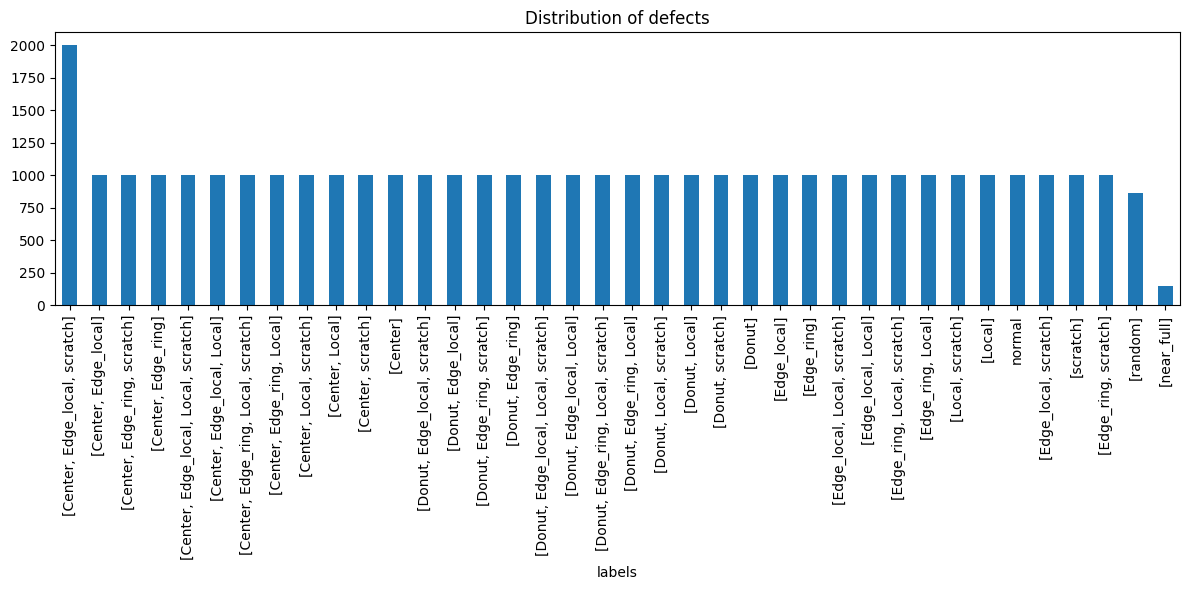

In [100]:
label_counts = df['labels'].value_counts()
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of defects')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [111]:
Y.sum(axis=0)

array([13000, 12000, 13000, 12000, 18000,   149, 19000,   866])

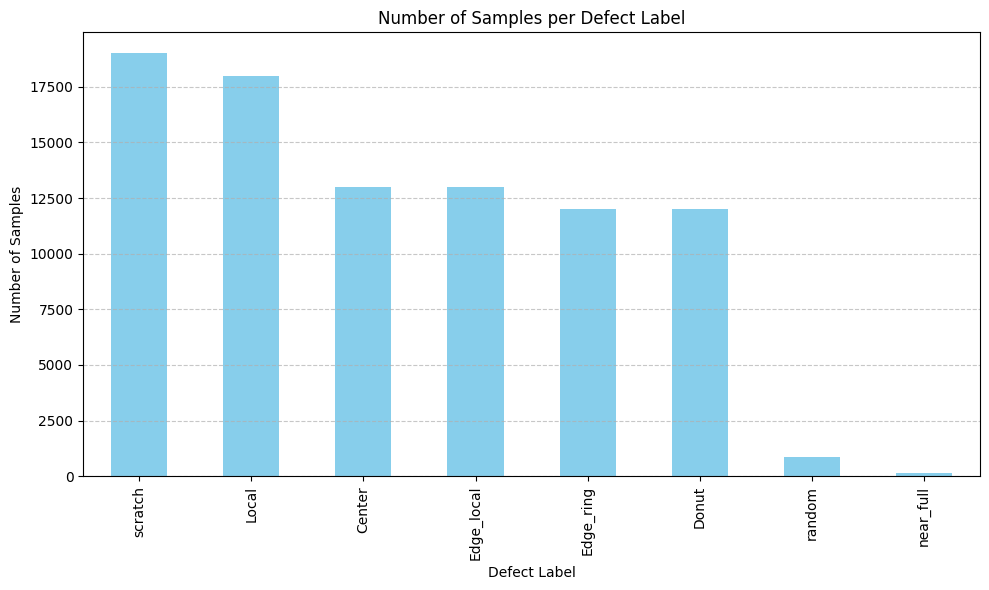

In [107]:
label_counts = pd.Series(Y.sum(axis=0), index=sample_class_label).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Defect Label')
plt.xlabel('Defect Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**The near_full and random classes have the fewest samples, meaning the model might miss or misclassify these classes. However, using a multilabel approach can still improve overall performance, since it allows the model to learn each label independently, even if some are rare.**

In [113]:
Y_df = pd.DataFrame(Y, columns=sample_class_label)
corr_matrix = Y_df.corr()
corr_matrix

,Center,Donut,Edge_local,Edge_ring,Local,near_full,scratch,random
Center,1.000000,-0.489610,0.064807,-0.012366,-0.017266,-0.045221,0.055738,-0.110067
Donut,-0.489610,1.000000,-0.012366,0.025818,0.036050,-0.042604,0.000268,-0.103696
Edge_local,0.064807,-0.012366,1.000000,-0.489610,-0.017266,-0.045221,0.055738,-0.110067
Edge_ring,-0.012366,0.025818,-0.489610,1.000000,0.036050,-0.042604,0.000268,-0.103696
Local,-0.017266,0.036050,-0.017266,0.036050,1.000000,-0.059488,0.000374,-0.144792
near_full,-0.045221,-0.042604,-0.045221,-0.042604,-0.059488,1.000000,-0.062704,-0.009578
scratch,0.055738,0.000268,0.055738,0.000268,0.000374,-0.062704,1.000000,-0.152621
random,-0.110067,-0.103696,-0.110067,-0.103696,-0.144792,-0.009578,-0.152621,1.000000


<Axes: >

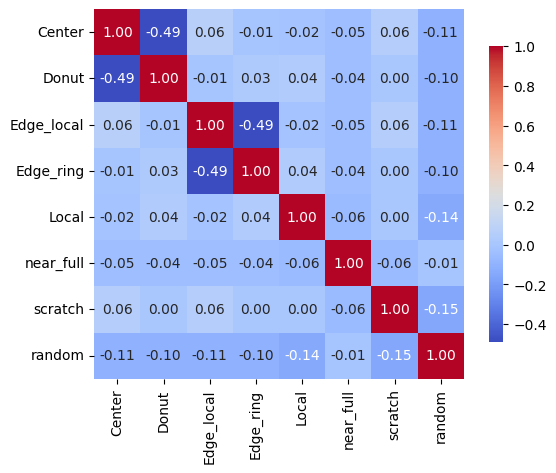

In [115]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})

**Low co-occurrence between classes suggests that the presence of one class does not influence or relate to the presence of another.**